In [2]:
!pip install networkx
!pip install torch torchvision torchaudio
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [4]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.nn import GCNConv

# For DRL, assuming PyTorch is used
import gym

In [7]:
# Load the Cora dataset and apply normalization transformation
coraDataset = Planetoid(root='/tmp/Cora', name='Cora', transform=T.NormalizeFeatures())

cData = coraDataset[0]  # Get the first graph object from the dataset

print(f'Number of classes: {coraDataset.num_classes}')
print(f'Number of nodes: {cData.num_nodes}')
print(f'Number of edges: {cData.num_edges}')
print(f'Number of features per node: {cData.num_node_features}')

Number of classes: 7
Number of nodes: 2708
Number of edges: 10556
Number of features per node: 1433


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/FYP/raw_data2.csv'

data = pd.read_csv(file_path)

# Show basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           899 non-null    float64
 1   SenderID            899 non-null    float64
 2   ReceiverID          899 non-null    float64
 3   Timestamp_Raw       899 non-null    float64
 4   Pathloss            899 non-null    float64
 5   PropDelay           899 non-null    float64
 6   Distance            899 non-null    float64
 7   Sender_XVelocity    899 non-null    float64
 8   Sender_YVelocity    899 non-null    float64
 9   Receiver_XVelocity  899 non-null    float64
 10  Receiver_YVelocity  899 non-null    float64
dtypes: float64(11)
memory usage: 429.7 KB


,Timestamp,SenderID,ReceiverID,Timestamp_Raw,Pathloss,PropDelay,Distance,Sender_XVelocity,Sender_YVelocity,Receiver_XVelocity,Receiver_YVelocity
0,0.0,4.0,1.0,0.135006,122.7,2.412000e-06,723.740931,-6.000000e-09,-9.000000e-10,-6.000000e-09,-9.000000e-10
1,0.0,4.0,2.0,0.135006,77.4,1.076000e-06,322.740648,-6.000000e-09,-9.000000e-10,-6.000000e-09,-9.000000e-10
2,0.0,4.0,3.0,0.135006,62.8,3.850000e-07,115.581421,-6.000000e-09,-9.000000e-10,-6.000000e-09,-9.000000e-10
3,0.0,4.0,5.0,0.135006,69.3,6.670000e-07,200.156166,-6.000000e-09,-9.000000e-10,-6.000000e-09,-9.000000e-10
4,0.0,4.0,6.0,0.135006,72.6,8.990000e-07,269.675504,-6.000000e-09,-9.000000e-10,-6.000000e-09,-9.000000e-10


In [10]:
# Preprocessing Step 1: Checking for missing values

# Check for any missing values in the dataset
missing_values = data.isnull().sum()

missing_values

Timestamp             4100
SenderID              4100
ReceiverID            4100
Timestamp_Raw         4100
Pathloss              4100
PropDelay             4100
Distance              4100
Sender_XVelocity      4100
Sender_YVelocity      4100
Receiver_XVelocity    4100
Receiver_YVelocity    4100
dtype: int64

In [11]:
# Impute missing values with median for numerical columns
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column].fillna(data[column].median(), inplace=True)

# Check again for missing values to ensure they've been addressed
print(data.isnull().sum())

Timestamp             0
SenderID              0
ReceiverID            0
Timestamp_Raw         0
Pathloss              0
PropDelay             0
Distance              0
Sender_XVelocity      0
Sender_YVelocity      0
Receiver_XVelocity    0
Receiver_YVelocity    0
dtype: int64


In [40]:
import numpy as np
import torch
import joblib
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Feature Selection
selected_data = data[['PropDelay', 'Distance', 'Sender_XVelocity', 'Sender_YVelocity', 'Receiver_XVelocity', 'Receiver_YVelocity']]

# Normalization/Scaling
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_data.select_dtypes(include=[np.number]))
scaled_features_df = pd.DataFrame(scaled_features, columns=selected_data.columns)

scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

print(scaled_features_df.describe().round(2))

       PropDelay  Distance  Sender_XVelocity  Sender_YVelocity  \
count    4999.00   4999.00           4999.00           4999.00   
mean        0.00      0.00             -0.00              0.00   
std         1.00      1.00              1.00              1.00   
min        -2.64     -2.64             -4.88             -4.41   
25%        -0.11     -0.11             -0.06             -0.16   
50%        -0.11     -0.11             -0.06             -0.16   
75%        -0.11     -0.11             -0.06             -0.16   
max         7.07      7.07              4.38              4.46   

       Receiver_XVelocity  Receiver_YVelocity  
count             4999.00             4999.00  
mean                -0.00                0.00  
std                  1.00                1.00  
min                 -4.63               -4.85  
25%                 -0.05               -0.14  
50%                 -0.05               -0.14  
75%                 -0.05               -0.14  
max                  

In [41]:
# Encoding Categorical Data
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(selected_data.select_dtypes(include=['object', 'category'])).toarray()

# Creating a DataFrame from encoded features with column names
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(selected_data.select_dtypes(include=['object', 'category']).columns))

# Combining scaled and encoded features
# Make sure the indexes align when combining
scaled_features_df.reset_index(drop=True, inplace=True)
encoded_features_df.reset_index(drop=True, inplace=True)
combined_features_df = pd.concat([scaled_features_df, encoded_features_df], axis=1)

print(combined_features_df.shape)
print(combined_features_df.head())

(4999, 6)
   PropDelay  Distance  Sender_XVelocity  Sender_YVelocity  \
0   0.693501  0.694159           -0.0592         -0.157587   
1  -1.225674 -1.225984           -0.0592         -0.157587   
2  -2.218301 -2.217942           -0.0592         -0.157587   
3  -1.813206 -1.812965           -0.0592         -0.157587   
4  -1.479936 -1.480080           -0.0592         -0.157587   

   Receiver_XVelocity  Receiver_YVelocity  
0           -0.046878           -0.137053  
1           -0.046878           -0.137053  
2           -0.046878           -0.137053  
3           -0.046878           -0.137053  
4           -0.046878           -0.137053  


In [42]:
# Convert to PyTorch tensors
node_features = torch.tensor(combined_features_df.values, dtype=torch.float)

# Extracting unique nodes and mapping them to consecutive integers
unique_nodes = np.unique(data[['SenderID', 'ReceiverID']].values.flatten())
node_mapping = {node: i for i, node in enumerate(unique_nodes)}

# Mapping nodes in the dataset to this new mapping
sender_nodes = data['SenderID'].map(node_mapping)
receiver_nodes = data['ReceiverID'].map(node_mapping)

# Creating edge index
edge_index = torch.tensor(np.array([sender_nodes.values, receiver_nodes.values]), dtype=torch.long)
target_tensor = torch.tensor(data['PropDelay'], dtype=torch.float)

# Create a graph structure
graph_data = Data(x=node_features, edge_index=edge_index, y=target_tensor)

graph_data.num_nodes, graph_data.num_edges

print(f"Unique nodes: {len(unique_nodes)}")
print(f"Edge index shape: {edge_index.shape}")

Unique nodes: 24
Edge index shape: torch.Size([2, 4999])


In [85]:
class GNNModel(torch.nn.Module):
    def __init__(self, num_node_features):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(num_node_features, 64)
        self.conv2 = GCNConv(64, 64)
        self.conv3 = GCNConv(64, 1)
        self.dropout = 0.5

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv3(x, edge_index)

        return x

num_node_features = graph_data.x.shape[1]

model = GNNModel(num_node_features)

In [86]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # For multi-class classification
# loss_func = nn.SmoothL1Loss()
loss_func = nn.HuberLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [87]:
# train_mask = torch.rand(num_nodes) < 0.8  # Example: 80% of nodes for training
# test_mask = ~train_mask  # The remaining nodes for testing

# adding a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

for epoch in range(200):
    model.train()
    optimizer.zero_grad()  # Clear gradients from the previous step
    output = model(graph_data)  # Forward pass
    output = torch.squeeze(output)  # Adjust the output shape
    loss = loss_func(output, graph_data.y)
    # loss = criterion(output[train_mask], graph_data.y[train_mask])  # Only compute loss on training nodes
    loss = loss_func(output, graph_data.y)
    loss.backward()  # Backpropagation
    optimizer.step()  # Update model parameters
    scheduler.step()  # Update the learning rate

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch+10}, Loss: {loss.item():.6f}')

Epoch 10, Loss: 0.080895
Epoch 20, Loss: 0.056742
Epoch 30, Loss: 0.042714
Epoch 40, Loss: 0.035134
Epoch 50, Loss: 0.032004
Epoch 60, Loss: 0.021845
Epoch 70, Loss: 0.021929
Epoch 80, Loss: 0.020693
Epoch 90, Loss: 0.023026
Epoch 100, Loss: 0.023682
Epoch 110, Loss: 0.020901
Epoch 120, Loss: 0.021516
Epoch 130, Loss: 0.021263
Epoch 140, Loss: 0.023193
Epoch 150, Loss: 0.021333
Epoch 160, Loss: 0.020964
Epoch 170, Loss: 0.022573
Epoch 180, Loss: 0.020838
Epoch 190, Loss: 0.020473
Epoch 200, Loss: 0.020910


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model.eval()  # Set the model to evaluation mode

scaler = joblib.load(scaler_filename)

prop_delay_index = 0  # Index of PropDelay in the scaled features

with torch.no_grad():  # Disable gradient computation for evaluation
    predictions = model(graph_data).squeeze()  # Get model predictions
    predictions_np = predictions.cpu().numpy()

    # Create a dummy array with zeros to match the shape expected by the scaler
    dummy_array = np.zeros((len(predictions_np), scaled_features_df.shape[1]))
    # Place predictions in the correct column
    dummy_array[:, prop_delay_index] = predictions_np

    # Inverse transform to original scale
    predictions_original_scale = scaler.inverse_transform(dummy_array)[:, prop_delay_index]

# Calculate evaluation metrics
mae = mean_absolute_error(graph_data.y.cpu().numpy(), predictions_original_scale)
mse = mean_squared_error(graph_data.y.cpu().numpy(), predictions_original_scale)
rmse = np.sqrt(mse)
r2 = r2_score(graph_data.y.cpu().numpy(), predictions_original_scale)

# Print the metrics
print(f'Mean Absolute Error: {mae:.10f}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse:.10f}')
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 0.0000002955
Mean Squared Error: 5.0576190441389e-13
Root Mean Squared Error: 0.0000007112
R-squared: -0.0437


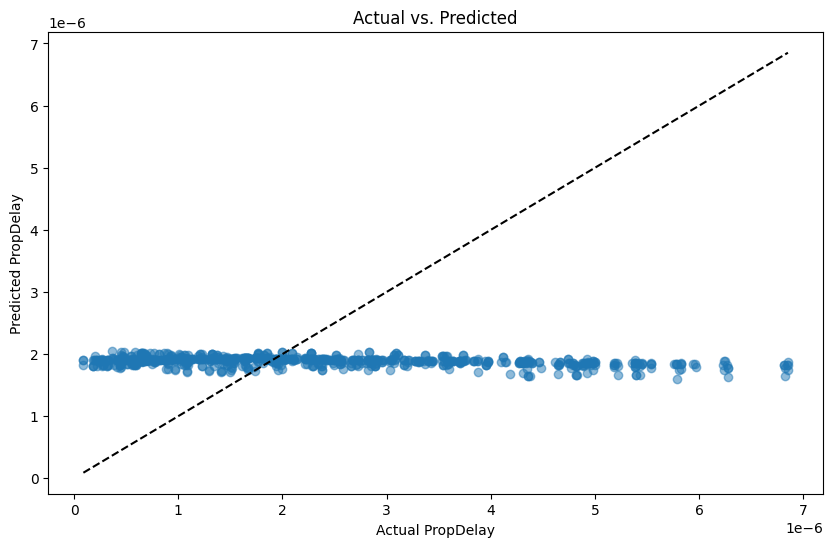

In [89]:
import matplotlib.pyplot as plt

actual = graph_data.y.cpu().numpy()
predicted = predictions_original_scale

plt.figure(figsize=(10, 6))
plt.scatter(actual, predicted, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual PropDelay')
plt.ylabel('Predicted PropDelay')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--') # Diagonal line
plt.show()

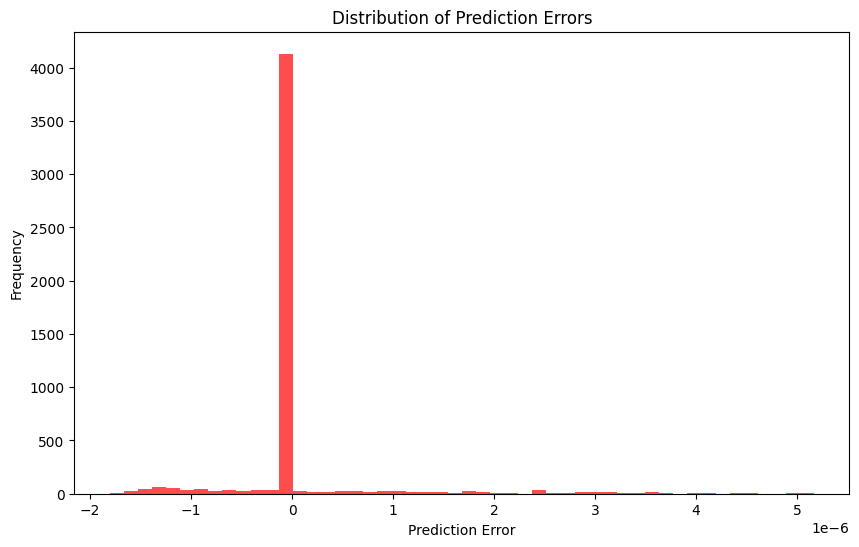

In [90]:
errors = actual - predicted

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, alpha=0.7, color='r')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/FYP/gnn_model.pth')

In [ ]:
# Create a model instance with the same architecture
loaded_model = GNNModel(num_node_features)

# Load the saved state dictionary
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/FYP/gnn_model.pth'))

# Don't forget to set the model to evaluation mode if you're doing inference
loaded_model.eval()

GNNModel(
  (conv1): GCNConv(6, 16)
  (conv2): GCNConv(16, 150)
)